In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import patsy # library 

In [3]:
now=datetime.now()
now

datetime.datetime(2019, 2, 1, 15, 48, 49, 952933)

In [5]:
now.year,now.month, now.day

(2019, 2, 1)

In [9]:
parse('2011-01-03')
datestrs=['2001-07-08 12:00:00', '2011-02-21 03:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2001-07-08 12:00:00', '2011-02-21 03:00:00'], dtype='datetime64[ns]', freq=None)

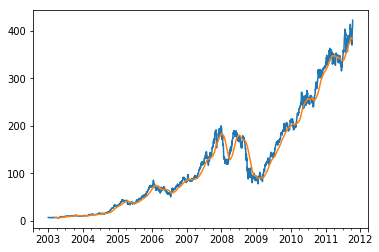

In [16]:
#moving window functions
close_px_all=pd.read_csv('pydata-book-2nd-edition/examples/stock_px_2.csv',index_col=0, parse_dates=True)
close_px=close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px=close_px.resample('B').ffill()
close_px.AAPL.plot()
close_px.AAPL.rolling(50).mean().plot()

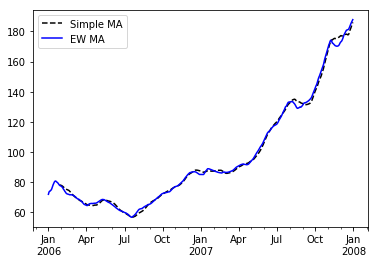

In [18]:
#exponentially weighted function
aapl_px=close_px.AAPL['2006':'2007']
ma60=aapl_px.rolling(30,min_periods=20).mean()
ewma60=aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='b-', label='EW MA')
plt.legend()

In [4]:
#using cathegoric al variables
np.random.seed(1234)
draws=np.random.randn(1000)
#quantile binning
bins=pd.qcut(draws,4, labels=['Q1','Q2','Q3', 'Q4'])
bins.codes[:10]

array([2, 0, 3, 1, 0, 3, 3, 0, 1, 0], dtype=int8)

In [6]:
#categorocal methods via cat attribute
s=pd.Series(list('abcd')*2)
cat_s=s.astype('category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [9]:
cat_s.cat.codes
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [10]:
#Group time resampling
N=15
times=pd.date_range('2007-05-20 00:00', freq='1min', periods=N)
df=pd.DataFrame({'time':times, 'value':np.arange(N)})
df

,time,value
0,2007-05-20 00:00:00,0
1,2007-05-20 00:01:00,1
2,2007-05-20 00:02:00,2
3,2007-05-20 00:03:00,3
4,2007-05-20 00:04:00,4
5,2007-05-20 00:05:00,5
6,2007-05-20 00:06:00,6
7,2007-05-20 00:07:00,7
8,2007-05-20 00:08:00,8
9,2007-05-20 00:09:00,9


In [12]:
#resample to 5 min
df.set_index('time').resample('5min').count()

,value
time,
2007-05-20 00:00:00,5
2007-05-20 00:05:00,5
2007-05-20 00:10:00,5
